# Q-1. Imagine you have a dataset where you have different Instagram features
like username , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is
to predict the number of likes and Time Since posted and the rest of the features are
your input features. Now you have to build a model which can predict the
number of likes and Time Since posted.
Dataset This is the Dataset You can use this dataset for this question.

In [ ]:
# This is still work in progress. Please check question 2 first . Thnk You

In [4]:
import chardet

# Specify the file path
file_path = r'C:\documents\ineuron\Assignments\ml_question1_data\instagram_reach.csv'

# Open the file in binary mode and read a portion of it to detect the encoding
with open(file_path, 'rb') as f:
    raw_data = f.read(100000)  # Read the first 100,000 bytes or adjust as needed

# Detect the encoding of the file
result = chardet.detect(raw_data)
encoding = result['encoding']
confidence = result['confidence']

print("Detected Encoding:", encoding)
print("Confidence:", confidence)


Detected Encoding: Windows-1254
Confidence: 0.5614033456781079


In [2]:
pip install chardet

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\0002J0744\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [23]:
import chardet
import pandas as pd

# Specify the file path


# Open the file in binary mode and read a portion of it to detect the encoding
with open(file_path, 'rb') as f:
    #print(chardet.detect(f.read()))
    raw_data = f.read(100000)  # Read the first 100,000 bytes or adjust as needed

# Detect the encoding of the file
result = chardet.detect(raw_data)
encoding = result['encoding']
confidence = result['confidence']

print("Detected Encoding:", encoding)
print("Confidence:", confidence)
error =False
# Read the file using the detected encoding
try:
    data = pd.read_csv(file_path, encoding=encoding)
    print("File read successfully with detected encoding.")
    print(data.head())
except UnicodeDecodeError:
    print("Unable to read the file with the detected encoding.")
    error =True

# If unable to read the file, try different encodings manually
if error:
    print("Trying different encodings:")

    encodings_to_try = ['utf-8', 'latin1', 'cp1252']  # Add more encodings to try if needed

    for encoding in encodings_to_try:
        try:
            data = pd.read_csv(file_path, encoding=encoding, index_col=False)
            print(f"File read successfully with {encoding} encoding.")
            print(data.head())
            break
        except UnicodeDecodeError:
            print(f"Unable to read the file with {encoding} encoding.")
else:
    print("Detected encoding has sufficient confidence.")


Detected Encoding: Windows-1254
Confidence: 0.5614033456781079
Unable to read the file with the detected encoding.
Trying different encodings:
File read successfully with utf-8 encoding.
   Unnamed: 0  S.No              USERNAME  \
0           0     1         mikequindazzi   
1           1     2       drgorillapaints   
2           2     3    aitrading_official   
3           3     4  opensourcedworkplace   
4           4     5           crea.vision   

                                             Caption  Followers  \
0  Who are #DataScientist and what do they do? >>...       1600   
1  We all know where it’s going. We just have to ...        880   
2  Alexander Barinov: 4 years as CFO in multinati...        255   
3                                               sfad        340   
4  Ever missed a call while your phone was chargi...        304   

                                            Hashtags Time since posted  Likes  
0  #MachineLearning #AI #DataAnalytics #DataScien...       

In [24]:
data.head(2)

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Drop irrelevant columns
data.drop(['S.No','Unnamed: 0'], axis=1, inplace=True)
data.head(2)

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23


In [26]:

# Convert time since posted to numeric representation (e.g., hours)
data['Time since posted'] = data['Time since posted'].apply(lambda x: int(x.split()[0]) if 'hour' in x else 0)
data.head(2)


,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23


In [14]:
# Split the dataset into input features (X) and target variables (y)
X = data.drop(['Likes', 'Time since posted'], axis=1)
y = data[['Likes', 'Time since posted']]

# Convert categorical variables to numerical representation using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300, 250,275,10,50,75,5],
    'max_depth': [None, 5, 10,2,3,7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4,3,6,7]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 250}
Mean Squared Error (MSE): 724.5734287311194
Mean Absolute Error (MAE): 13.44981333025829
R-squared (R2): -0.04463147271931678


### Lets Do EDA as Result is very bad

In [27]:
correlation_matrix = data.corr()
time_since_posted_correlation = correlation_matrix['Time since posted']
print(time_since_posted_correlation)


Followers            0.251154
Time since posted    1.000000
Likes                0.609888
Name: Time since posted, dtype: float64


#  Followers" has a positive correlation coefficient of 0.251154 with "Time Since Posted". This suggests a weak positive relationship between the number of followers and the time since a post was made.

## Likes" has a higher positive correlation coefficient of 0.609888 with "Time Since Posted". This indicates a stronger positive relationship between the number of likes and the time since a post was made.

## Seems "Time Since Posted" is a feature rather than dependent variable.

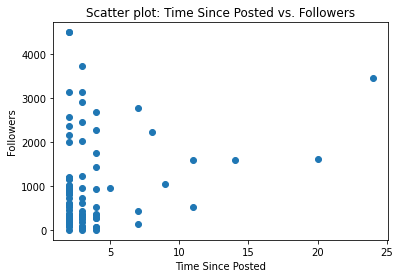

In [21]:
import matplotlib.pyplot as plt

plt.scatter(data['Time since posted'], data['Followers'])
plt.xlabel('Time Since Posted')
plt.ylabel('Followers')
plt.title('Scatter plot: Time Since Posted vs. Followers')
plt.show()

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           100 non-null    object
 1   Caption            94 non-null     object
 2   Followers          100 non-null    int64 
 3   Hashtags           100 non-null    object
 4   Time since posted  100 non-null    int64 
 5   Likes              100 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 4.8+ KB


In [29]:
df2 = data.copy()

In [30]:
df2=df2.dropna()

In [32]:
df2['USERNAME'].nunique()

90

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           94 non-null     object
 1   Caption            94 non-null     object
 2   Followers          94 non-null     int64 
 3   Hashtags           94 non-null     object
 4   Time since posted  94 non-null     int64 
 5   Likes              94 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 5.1+ KB


In [39]:
# Prepare the data
X = df2.drop(['Likes'], axis=1)
y_likes = df2['Likes']


0     139
1      23
2      25
3      49
4      30
     ... 
95     31
96     42
97     10
98    222
99    109
Name: Likes, Length: 94, dtype: int64

C:\Users\0002J0744\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\0002J0744\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129318 (\N{FACE PALM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\0002J0744\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\0002J0744\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127468 (\N{REGIONAL INDICATOR SYMBOL LETTER G}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\0002J0744\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylab

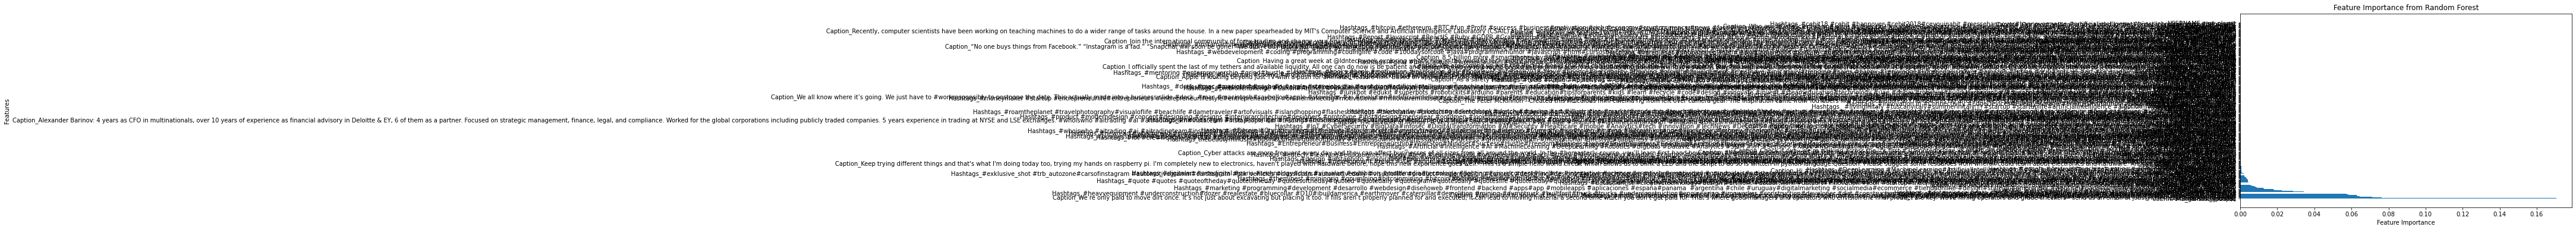

In [41]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Perform one-hot encoding on the username column
X_encoded = pd.get_dummies(X, columns=['USERNAME','Caption','Hashtags'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_likes, test_size=0.2, random_state=42)

# Initialize and train the random forest regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Get the feature importances
importances = rf.feature_importances_

# Sort the feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]

# Get the feature names
feature_names = X_encoded.columns[sorted_indices]




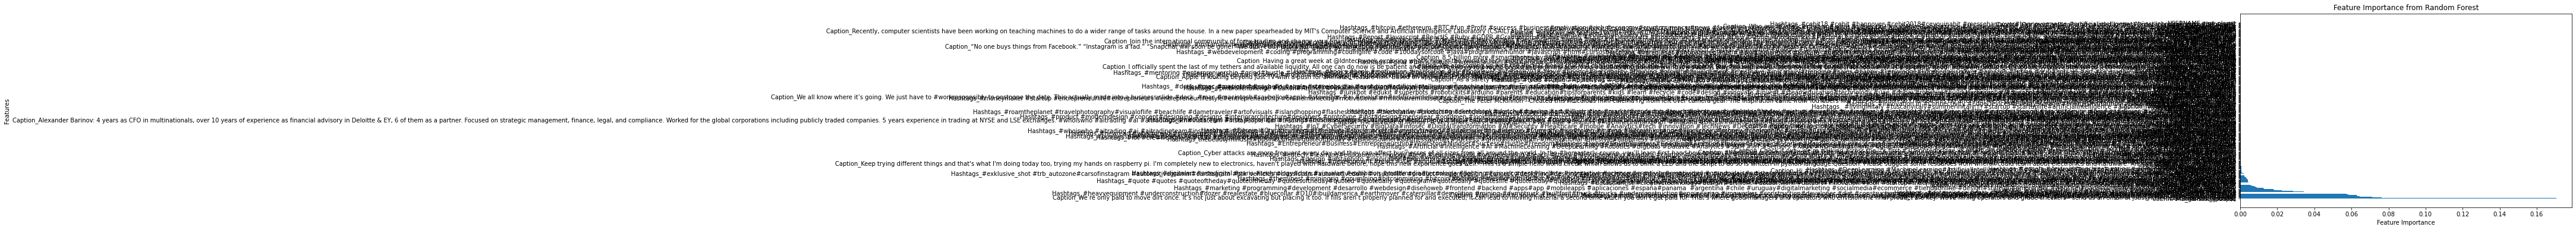

In [42]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importances)), sorted_importances, tick_label=feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.show()

90 unique username 

In [19]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score
# Preprocessing - Handle missing values
data['Caption'] = data['Caption'].fillna('')  # Replace missing values with empty string

# Preprocessing - Convert non-string values to strings
data['Caption'] = data['Caption'].astype(str)

# Preprocessing
data['Caption'] = data['Caption'].apply(lambda x: re.sub('[^a-zA-Z0-9\s#]', '', x))

# Split the data into input features (X) and target variables (y)
X = data[['Followers', 'Hashtags']]
y_likes = data['Likes']
y_time_since_posted = data['Time since posted']

# Split the data into training and testing sets
X_train, X_test, y_train_likes, y_test_likes, y_train_time, y_test_time = train_test_split(
    X, y_likes, y_time_since_posted, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    print(f"Training {name} model...")
    model.fit(X_train, y_train_likes)
    y_pred_likes = model.predict(X_test)
    
    print(f"\n{name} Model - Likes:")
    print(f"Mean Squared Error: {mean_squared_error(y_test_likes, y_pred_likes)}")
    print(f"R-squared: {r2_score(y_test_likes, y_pred_likes)}")
    
    model.fit(X_train, y_train_time)
    y_pred_time = model.predict(X_test)
    
    print(f"\n{name} Model - Time Since Posted:")
    print(f"Mean Squared Error: {mean_squared_error(y_test_time, y_pred_time)}")
    print(f"R-squared: {r2_score(y_test_time, y_pred_time)}")
    print("--------------------------------------------------")


Training Random Forest model...


ValueError: could not convert string to float: '#artificialintelligence\xa0#machinelearning#bigdata\xa0#supercomputer\xa0#science#astrophysics\xa0#astronomy\xa0#einstein#relativity\xa0#theoryofrelativity\xa0#georgiatech#computerscience\xa0#blackhole\xa0#universe#cosmos'

In [18]:
data.head()

,Caption,Followers,Hashtags,Time since posted,Likes
0,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139
1,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23
2,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25
3,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49
4,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30
